In [36]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [19]:
workspace = '/home/arthur/Dropbox/projects/modis_viirs_continuity/sensor_intercompare/stats/'
os.chdir(workspace)
stats = pd.read_csv('h08v05_stats.csv')


In [59]:
def compose_date(years, months=1, days=1, weeks=None, hours=None, minutes=None,
                 seconds=None, milliseconds=None, microseconds=None, nanoseconds=None):
    years = np.asarray(years) - 1970
    months = np.asarray(months) - 1
    days = np.asarray(days) - 1
    types = ('<M8[Y]', '<m8[M]', '<m8[D]', '<m8[W]', '<m8[h]',
             '<m8[m]', '<m8[s]', '<m8[ms]', '<m8[us]', '<m8[ns]')
    vals = (years, months, days, weeks, hours, minutes, seconds,
            milliseconds, microseconds, nanoseconds)
    return sum(np.asarray(v, dtype=t) for t, v in zip(types, vals)
               if v is not None)

In [81]:
stats['doy'] = stats['F2'].apply(lambda x: x[14:17])
stats['year'] = stats['F2'].apply(lambda x: x[10:14])

stats['doy'] = stats['doy'].astype(int)
stats['year'] = stats['year'].astype(int)

stats.sort_values(['doy'], inplace=True)
stats.drop_duplicates(keep='first', inplace=True)
stats.index = compose_date(stats['year'], days=stats['doy'])


In [66]:
# Separate out the different sensors for comparison

stats_mcd_vnp = stats[stats['F1'].str.contains('MCD')]
stats_mcd_vnp = stats_mcd_vnp[stats_mcd_vnp['F2'].str.contains('VNP')]
#print(stats_mcd_vnp.head())

stats_mcd_vj1 = stats[stats['F1'].str.contains('MCD')]
stats_mcd_vj1 = stats_mcd_vj1[stats_mcd_vj1['F2'].str.contains('VJ1')]
#print(stats_mcd_vj1.head())

stats_vj1_vnp = stats[stats['F1'].str.contains('VJ1')]
stats_vj1_vnp = stats_vj1_vnp[stats_vj1_vnp['F2'].str.contains('VNP')]
#print(stats_vj1_vnp.head())

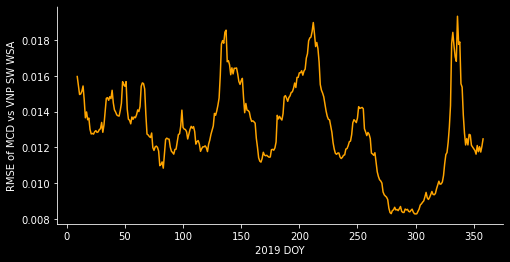

In [80]:
x = stats_mcd_vnp['doy']
y = stats_mcd_vnp['RMSE']

fig, ax = plt.subplots(figsize=(8, 4))

fig.set_facecolor('black')
ax.set_facecolor('black')

ax.plot(x, y, c='orange')
ax.set_xlabel('2019 DOY', c='w')
ax.set_ylabel('RMSE of MCD vs VNP SW WSA', c='w')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

